In [1]:
##Predict if patients will be undergoing thyroid surgery based on their blood work

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import datetime
import os
import collections

import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, precision_recall_curve,
                             precision_score, recall_score, roc_auc_score,
                             roc_curve)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (cross_validate, train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold


import keras
from keras.callbacks import TensorBoard
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

from keras.utils.vis_utils import plot_model

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [4]:
dataset_file = "/content/drive/MyDrive/506/Final Project/thyroid_preprocessed.csv"
df = pd.read_csv(dataset_file)
df.shape

(8624, 29)

In [5]:
pd.set_option('display.max_columns', None)
df

,age_group,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,FTI_measured,FTI,TBG_measured,TBG,diagnosis_name,avg_value
0,1.0,18,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2.50,1,2.7,1,131.0,1,149.0,0,0.0,none,0.0
1,1.0,18,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.25,1,2.5,1,269.0,1,165.0,0,0.0,none,0.0
2,1.0,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.33,0,0.0,1,154.0,1,179.0,0,0.0,none,0.0
3,1.0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,1,2.4,1,86.0,1,85.0,0,0.0,none,0.0
4,1.0,18,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.50,0,0.0,1,116.0,1,111.0,0,0.0,none,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,8.0,95,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.60,0,0.0,1,98.0,1,108.0,0,0.0,none,0.0
8620,8.0,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.40,1,0.4,1,54.0,1,87.0,0,0.0,none,0.0
8621,8.0,97,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.20,1,1.3,1,84.0,1,87.0,0,0.0,none,0.0
8622,8.0,97,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.90,1,0.5,1,101.0,1,158.0,0,0.0,none,0.0


In [6]:
##features extracted for the models

##X_df = df.loc[:,['age', 'sex', 'TSH', 'T3', 'TT4', 'FTI', 'TBG']]
X_df = df.drop(['thyroid_surgery', 'age_group', 'diagnosis_name', 'avg_value'], axis = 1)
y_df = df['thyroid_surgery']

In [7]:
##splitting the data into train/test sets

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=50)

In [8]:
##conducting random oversample of the data

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 50)

In [9]:
X_train.shape, X_test.shape

((6899, 25), (1725, 25))

In [10]:
Counter(y_train), Counter(y_test)

(Counter({0: 6807, 1: 92}), Counter({0: 1690, 1: 35}))

In [11]:
##logistic regression test for random over sample

lr_model = LogisticRegression(max_iter = 5000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [12]:
y_pred = lr_model.predict(X_test)

accuracy = lr_model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9797101449275363


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       0.00      0.00      0.00        35

    accuracy                           0.98      1725
   macro avg       0.49      0.50      0.49      1725
weighted avg       0.96      0.98      0.97      1725



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

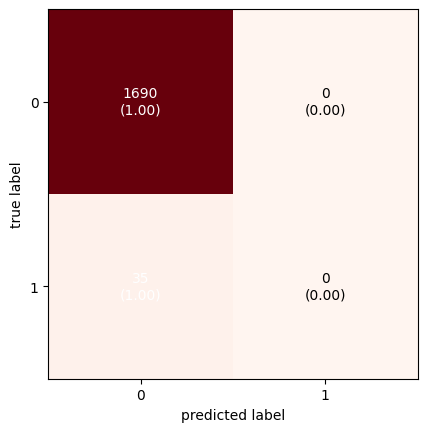

In [14]:
#performing a confusion matrix on the logistic regression

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')

In [15]:
##random forest classifier for random over sample

rfc = RandomForestClassifier(n_estimators = 50, random_state = 25)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=25)

In [16]:
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9797101449275363


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       0.00      0.00      0.00        35

    accuracy                           0.98      1725
   macro avg       0.49      0.50      0.49      1725
weighted avg       0.96      0.98      0.97      1725



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

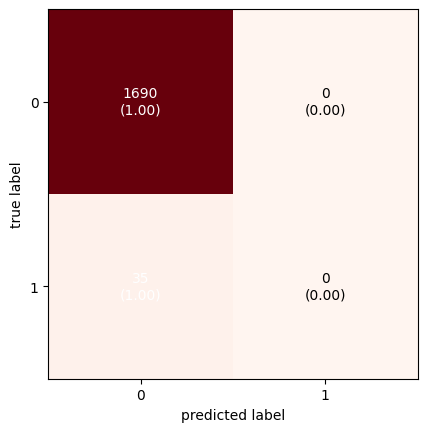

In [18]:
#performing a confusion matrix on the random forest

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')

In [19]:
##cross validation on Random Forest with the over sample

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle = True, random_state = 50)
rfc = RandomForestClassifier(n_estimators = 50, max_depth = 5)
accuracies = []

for fold, (train_index, test_index) in enumerate(kf.split(X_df)):
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Fold {fold}: Accuracy = {accuracy}")

Fold 0: Accuracy = 0.9797101449275363
Fold 1: Accuracy = 0.9820289855072464
Fold 2: Accuracy = 0.9884057971014493
Fold 3: Accuracy = 0.9895652173913043
Fold 4: Accuracy = 0.9866589327146171


In [20]:
avg_accuracy = np.mean(accuracies)
print(f"Average Accuracy = {avg_accuracy}")

Average Accuracy = 0.9852738155284306


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1701
           1       0.00      0.00      0.00        23

    accuracy                           0.99      1724
   macro avg       0.49      0.50      0.50      1724
weighted avg       0.97      0.99      0.98      1724



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

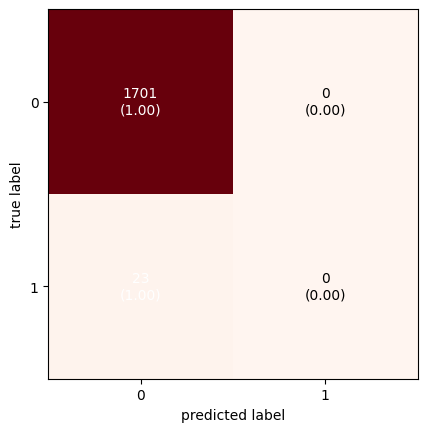

In [22]:
#performing a confusion matrix on the cross validaton random forest

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')

In [23]:
##neural networks for random over sample

clf = Sequential()

clf.add(Dense(units = 32, 
              kernel_initializer = 'uniform',
              activation = 'relu', 
              input_dim = X_train.shape[1]))

clf.add(Dense(units = 8, 
              kernel_initializer = 'uniform', 
              activation = 'relu'))

dropout = 0.3
clf.add(Dropout(dropout))

clf.add(Dense(units = 1, 
              kernel_initializer = 'uniform', 
              activation = 'sigmoid'))

clf.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

In [24]:
clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = clf.fit(X_train, 
                  y_train, 
                  validation_split = 0.3,
                  batch_size = 32, 
                  epochs = 50)

Epoch 1/50
151/151 [==============================] - 2s 4ms/step - loss: 0.2019 - accuracy: 0.9797 - val_loss: 0.0511 - val_accuracy: 0.9918
Epoch 2/50
151/151 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.9820 - val_loss: 0.0504 - val_accuracy: 0.9918
Epoch 3/50
151/151 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9820 - val_loss: 0.0509 - val_accuracy: 0.9918
Epoch 4/50
151/151 [==============================] - 0s 3ms/step - loss: 0.1092 - accuracy: 0.9820 - val_loss: 0.0509 - val_accuracy: 0.9918
Epoch 5/50
151/151 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9820 - val_loss: 0.0531 - val_accuracy: 0.9918
Epoch 6/50
151/151 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.9820 - val_loss: 0.0528 - val_accuracy: 0.9918
Epoch 7/50
151/151 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9820 - val_loss: 0.0499 - val_accuracy: 0.9918
Epoch 

In [26]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label = 'Training acc')
    plt.plot(x, val_acc, 'r', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label = 'Training loss')
    plt.plot(x, val_loss, 'r', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [27]:
y_pred_prob = clf.predict(X_test)

54/54 [==============================] - 0s 1ms/step


In [28]:
y_pred_prob[:5]

array([[2.5660135e-02],
       [9.9972086e-10],
       [5.5930644e-02],
       [1.8026698e-02],
       [1.5305966e-02]], dtype=float32)

In [29]:
y_pred = (clf.predict(X_test) > 0.5).astype("int32")

54/54 [==============================] - 0s 1ms/step


In [30]:
y_pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1701
           1       0.00      0.00      0.00        23

    accuracy                           0.99      1724
   macro avg       0.49      0.50      0.50      1724
weighted avg       0.97      0.99      0.98      1724



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

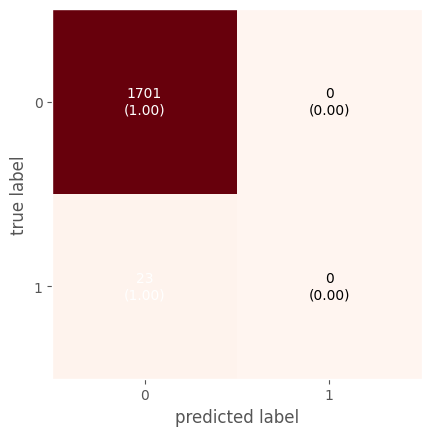

In [32]:
#performing a confusion matrix on the neural networks

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')

In [33]:
##conducting a random under sample of the data

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_df, y_df)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 50)

In [34]:
X_train.shape, X_test.shape

((203, 25), (51, 25))

In [35]:
Counter(y_train), Counter(y_test)

(Counter({1: 103, 0: 100}), Counter({0: 27, 1: 24}))

In [36]:
##logistic regression test for random under sample

lr_model = LogisticRegression(max_iter = 5000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [37]:
y_pred = lr_model.predict(X_test)

accuracy = lr_model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5686274509803921


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        27
           1       0.54      0.54      0.54        24

    accuracy                           0.57        51
   macro avg       0.57      0.57      0.57        51
weighted avg       0.57      0.57      0.57        51



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

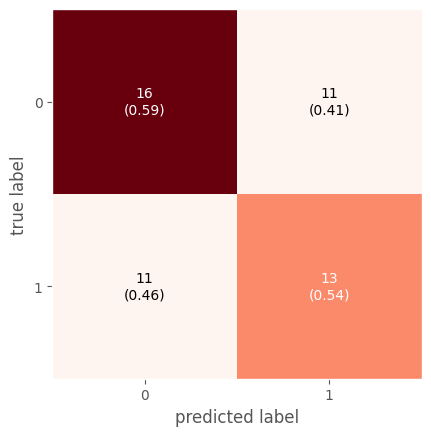

In [39]:
#performing a confusion matrix on the logistic regression

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')

In [40]:
##random forest classifier for random under sample

rfc = RandomForestClassifier(n_estimators = 50, random_state = 25)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=25)

In [41]:
y_pred = rfc.predict(X_test)

accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5686274509803921


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        27
           1       0.54      0.54      0.54        24

    accuracy                           0.57        51
   macro avg       0.57      0.57      0.57        51
weighted avg       0.57      0.57      0.57        51



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

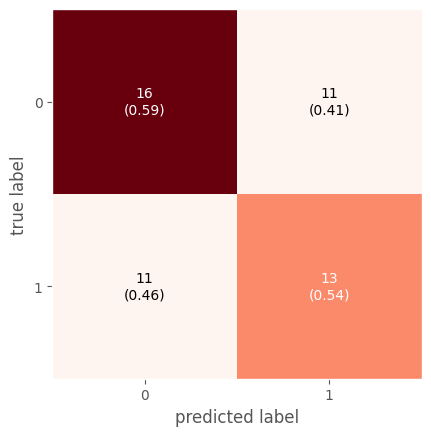

In [43]:
#performing a confusion matrix on the random forest

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')

In [44]:
##neural networks for random under sample

clf = Sequential()

clf.add(Dense(units = 32, 
              kernel_initializer = 'uniform',
              activation = 'relu', 
              input_dim = X_train.shape[1]))

clf.add(Dense(units = 8, 
              kernel_initializer = 'uniform', 
              activation = 'relu'))

dropout = 0.3
clf.add(Dropout(dropout))

clf.add(Dense(units = 1, 
              kernel_initializer = 'uniform', 
              activation = 'sigmoid'))

clf.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

In [45]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                832       
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = clf.fit(X_train, 
                  y_train, 
                  validation_split = 0.3,
                  batch_size = 32, 
                  epochs = 50)

Epoch 1/50
5/5 [==============================] - 1s 52ms/step - loss: 0.6942 - accuracy: 0.4366 - val_loss: 0.6932 - val_accuracy: 0.4590
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6929 - accuracy: 0.5141 - val_loss: 0.6929 - val_accuracy: 0.4754
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.5211 - val_loss: 0.6929 - val_accuracy: 0.4754
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6918 - accuracy: 0.5634 - val_loss: 0.6925 - val_accuracy: 0.4918
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6923 - accuracy: 0.4930 - val_loss: 0.6912 - val_accuracy: 0.6557
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6916 - accuracy: 0.4859 - val_loss: 0.6903 - val_accuracy: 0.5902
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6919 - accuracy: 0.5211 - val_loss: 0.6898 - val_accuracy: 0.6066
Epoch 8/50
5/5 [============

In [47]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label = 'Training acc')
    plt.plot(x, val_acc, 'r', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label = 'Training loss')
    plt.plot(x, val_loss, 'r', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [48]:
y_pred_prob = clf.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [49]:
y_pred_prob[:5]

array([[0.4501466 ],
       [0.55750304],
       [0.4419582 ],
       [0.4566926 ],
       [0.48326027]], dtype=float32)

In [50]:
y_pred = (clf.predict(X_test) > 0.5).astype("int32")

2/2 [==============================] - 0s 7ms/step


In [51]:
y_pred[:5]

array([[0],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.70      0.60        27
           1       0.47      0.29      0.36        24

    accuracy                           0.51        51
   macro avg       0.50      0.50      0.48        51
weighted avg       0.50      0.51      0.49        51



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

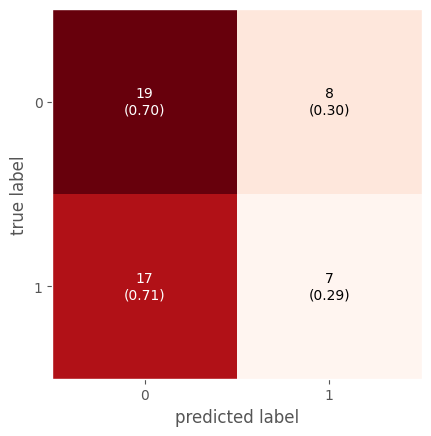

In [53]:
#performing a confusion matrix on the neural network

plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      show_absolute = True, 
                      show_normed = True,
                      cmap = 'Reds')